<a href="https://colab.research.google.com/github/MannAgrawal/Pothole-Detection-YOLOV3/blob/master/pothole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13057, done.
remote: Total 13057 (delta 0), reused 0 (delta 0), pack-reused 13057
Receiving objects: 100% (13057/13057), 11.77 MiB | 18.94 MiB/s, done.
Resolving deltas: 100% (8926/8926), done.


In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variabl

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
from google.colab import drive
drive.mount('/content/mydrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mydrive


In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/mydrive/My\ Drive/project_files/yolov3/pothole_detection/ /mydrive
!ls /mydrive

backup		   generate_train.py  obj.names  yolov3_custom.cfg
darknet53.conv.74  obj.data	      obj.zip


In [0]:
%cd /content/mydrive/

/content/mydrive


# New Section

In [0]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive

backup		   generate_train.py  obj.names  yolov3_custom.cfg
darknet53.conv.74  obj.data	      obj.zip


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/obj.zip /content

In [0]:
%cd /content/darknet
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

/content/darknet
Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/1.jpg          
  inflating: data/obj/1.txt          
  inflating: data/obj/10.jpg         
  inflating: data/obj/10.txt         
  inflating: data/obj/100.jpg        
  inflating: data/obj/100.txt        
  inflating: data/obj/1000.jpg       
  inflating: data/obj/1000.txt       
  inflating: data/obj/1001.jpg       
  inflating: data/obj/1001.txt       
  inflating: data/obj/1002.jpg       
  inflating: data/obj/1002.txt       
  inflating: data/obj/1003.jpg       
  inflating: data/obj/1003.txt       
  inflating: data/obj/1004.jpg       
  inflating: data/obj/1004.txt       
  inflating: data/obj/1005.jpg       
  inflating: data/obj/1005.txt       
  inflating: data/obj/1006.jpg       
  inflating: data/obj/1006.txt       
  inflating: data/obj/1007.jpg       
  inflating: data/obj/1007.txt       
  inflating: data/obj/1008.jpg       
  inflating: data/obj/1008.txt       
  inflating: data/obj/1009.

In [0]:
# download cfg to google drive and change its name
# !cp cfg/yolov3-tiny_obj.cfg /mydrive/yolov3-tiny_obj_custom.cfg

In [0]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
# download('cfg/yolov3-tiny_obj.cfg')

In [0]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3_custom.cfg cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/obj.names ./data
!cp /mydrive/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [0]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

In [0]:
!python generate_train.py

In [0]:
# !cp /mydrive/darknet53.conv.74 ./

In [0]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     test.txt
coco.names  goal.txt	 labels			   openimages.names  train.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


In [0]:
# train your custom detector
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

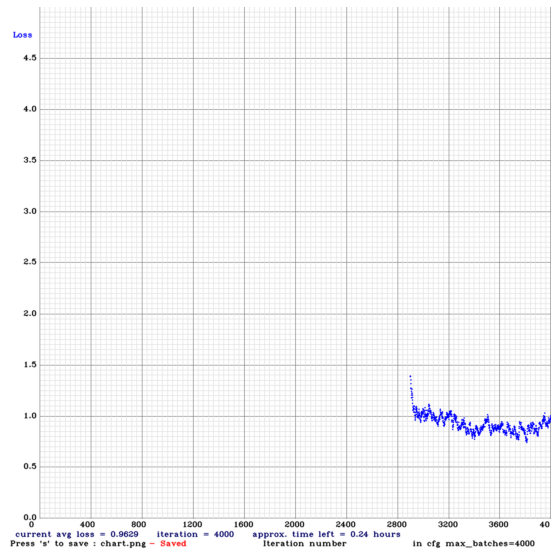

In [0]:
imShow('chart.png')

In [0]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [0]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/backup/yolov3_custom_last.weights -dont_show

v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.853397, GIOU: 0.851490), Class: 0.999716, Obj: 0.837687, No Obj: 0.000243, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.006611, iou_loss = 0.009150, total_loss = 0.015761 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000051, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.015500, iou_loss = 0.000000, total_loss = 0.015500 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.717102, GIOU: 0.707856), Class: 0.998977, Obj: 0.415519, No Obj: 0.000093, .5R: 1.000000, .75R: 0.200000, count: 5, class_loss = 0.845502, iou_loss = 0.421885, total_loss = 1.267387 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.779245, GIOU: 0.767809), Class: 0.999272, Obj: 0.668719, No Obj: 0.004734, .5R: 1.000000, .75R: 0.583333, count: 12, class_loss = 1.076872, iou_loss = 0.694491, total

In [0]:
# # need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

#changing back to traing configuration
# need to set our custom cfg to test mode 
# %cd cfg
# !sed -i 's/batch=1/batch=64/' yolov3_custom.cfg
# !sed -i 's/subdivisions=1/subdivisions=16/' yolov3_custom.cfg
# %cd ..

/content/darknet/cfg
/content/darknet


In [0]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-tiny_obj_custom.cfg /mydrive/yolov3/backup2/yolov3-tiny_obj_custom_final.weights /mydrive/yolov3/test/D_0011_279.jpg -thresh 0.3
imShow('predictions.jpg')